 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")

# YOUR CODE HERE
whale_returns_DF=pd.read_csv(whale_returns_csv,index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns_DF.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns_DF.isnull().sum()
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
# YOUR CODE HERE
whale_returns_DF=whale_returns_DF.dropna()
whale_returns_DF.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [5]:
#check data types and print head 
print(whale_returns_DF.dtypes)
whale_returns_DF.head()

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_returns_DF=pd.read_csv(algo_returns_csv,index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns_DF.tail()
#algo_returns_DF.head()

,Algo 1,Algo 2
Date,,
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829
2019-04-30,-0.002944,-0.001570
2019-05-01,0.000094,-0.007358


In [7]:
# Count nulls
# YOUR CODE HERE
algo_returns_DF.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Sort index of algo returns
algo_returns_DF=algo_returns_DF.sort_index()

In [9]:
#Drop nulls Algo
algo_returns_DF=algo_returns_DF.dropna()
algo_returns_DF.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history_DF=pd.read_csv(sp500_history_csv,index_col="Date", infer_datetime_format=True, parse_dates=True)

sp500_history_DF=sp500_history_DF.sort_index()
sp500_history_DF.head()


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [11]:
# Check Data Types
# YOUR CODE HERE
sp500_history_DF.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types
# YOUR CODE HERE
#convert SP500 closing prices to daily returns by elimninating $ signs and converting to float
sp500_history_DF.dtypes
sp500_history_DF['Close'] = sp500_history_DF['Close'].str.replace('$', '')
sp500_history_DF['Close']=sp500_history_DF['Close'].astype(float)


In [13]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_history_DF=sp500_history_DF.sort_index()
sp500_returns_DF=sp500_history_DF.pct_change()
sp500_returns_DF.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [14]:
# Drop nulls
# YOUR CODE HERE
sp500_returns_DF=sp500_returns_DF.dropna()
sp500_returns_DF.head()


,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [15]:
# Rename Column
# YOUR CODE HERE
#sp500_returns_DF=sp500_returns_DF.sort_index()
sp500_returns_DF=sp500_returns_DF.rename(columns={'Close':'S&P 500'})
sp500_returns_DF.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
CombinedReturns_DF=pd.concat([whale_returns_DF,algo_returns_DF,sp500_returns_DF],axis="columns",join="inner")
CombinedReturns_DF=CombinedReturns_DF.dropna()
CombinedReturns_DF.head()
#CombinedReturns_DF.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

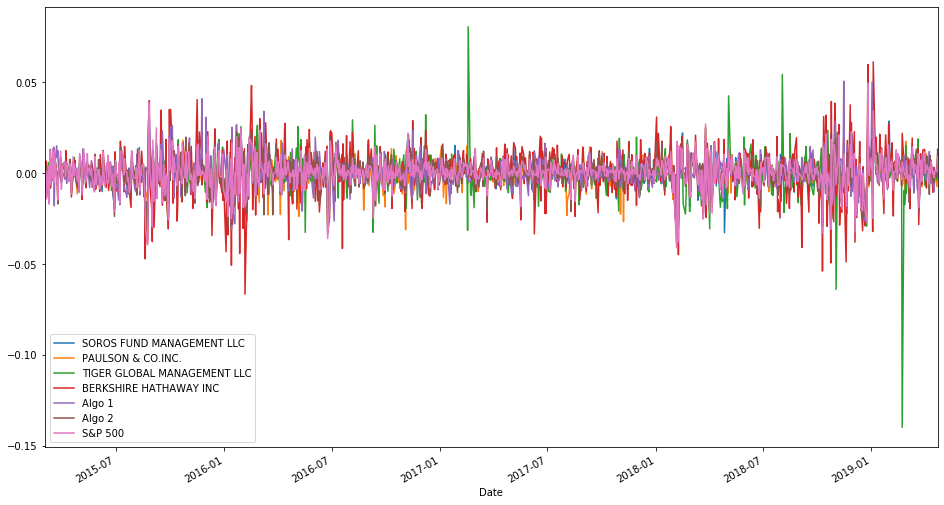

In [17]:
# Plot daily returns
# YOUR CODE HERE
#import matplotlib.ticker as mtick
plt.rcParams["figure.figsize"] = [16,9]
ax=CombinedReturns_DF.plot()
#ax.yaxis.set_major_formatter(mtick.PercentFormatter())

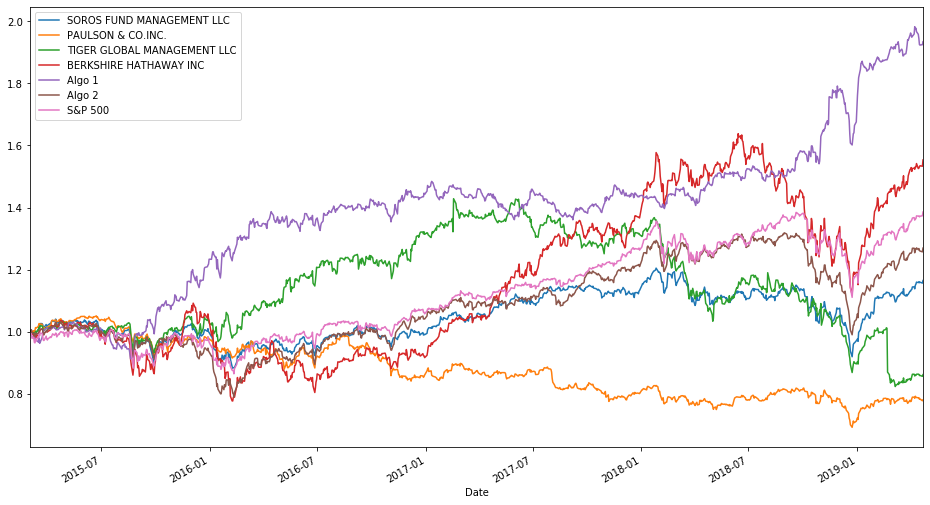

In [18]:
# Plot cumulative returns
# YOUR CODE HERE
((CombinedReturns_DF + 1).cumprod() ).plot() #"Starts with $1 balance"
# ((CombinedReturns_DF + 1).cumprod() -1).plot() "For starting at zero"

In [19]:
##Does any portfolio outperform the S&P 500?
cumprodseries =((CombinedReturns_DF + 1).cumprod() )
print(cumprodseries.iloc[-1]>cumprodseries.iloc[-1,6])

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC    False
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                         False
S&P 500                        False
Name: 2019-04-23 00:00:00, dtype: bool


## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

## Does any portfolio outperform S&P 500 ?
Output above prints cumulative returns of all portfolios and compares with S&P500 using a logical boolean operator. As seen, two portfolios Berkshire Hathway and Algo 1 outperform on a purely returns basis. The cumprod plot visually highlights outperfomance of BH Inc. and Algo 1 portfolios on a purely return basis.

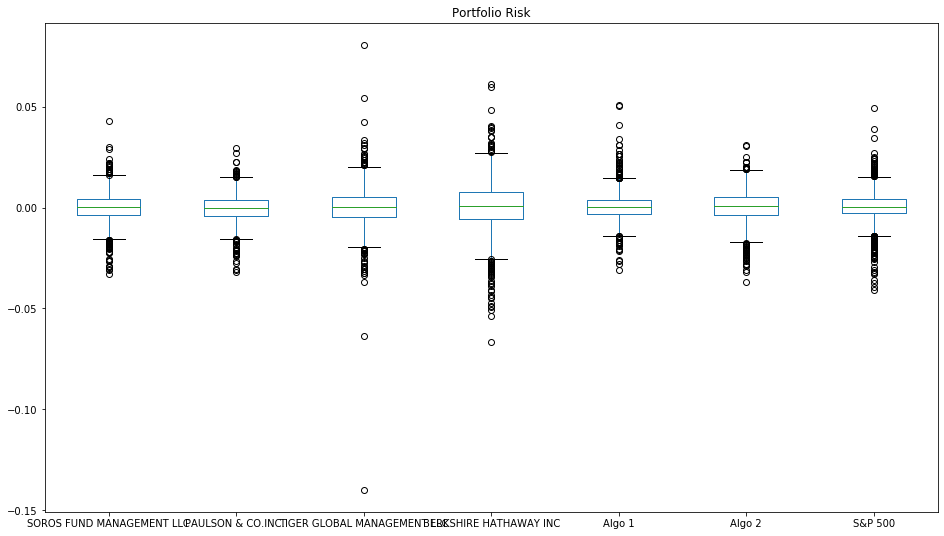

In [20]:
# Box plot to visually show risk
# YOUR CODE HERE
ax=CombinedReturns_DF.plot(kind='box',title='Portfolio Risk')
ax.tick_params(axis="y", labelsize=10)

## Risk Analysis
### Box Plot Spread
Response considers distance between the 'whiskers' as spread of the boxplot; based on this BH Inc. portflio has highest spread:
1. The whiskers of BH distribution which represent a default cutoff point beyond which data are classified as outliers is widest for BH
2. Additionally BH Inc has highest Interquartile Range (Q1-Q3) - implying width of return ranges
3. Optically BH Inc has maximum outliers beyond whiskers
4. However, the Tiger portfolio has the most extreme outliers (both positive and negative); but BH Inc. distribution has more width
5. Similarly the Algo 1 has smallest spread (whisker and box width)
[Matplotlib documentation](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.boxplot)

### Standard Deviation
Standard deviations of each of the portfolios (both daily and annualized) are presented below. The Tiger and BH Inc. portfolios are riskier than S&P 500. The annualized standard deviation is calculated in line 263, and assumes a 252 trading day year for annualization purposes.


In [21]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
CombinedReturns_DF.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [22]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
CombinedReturns_DF.std()>CombinedReturns_DF['S&P 500'].std()

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [23]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
import numpy as np
CombinedReturns_DF.std()*np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

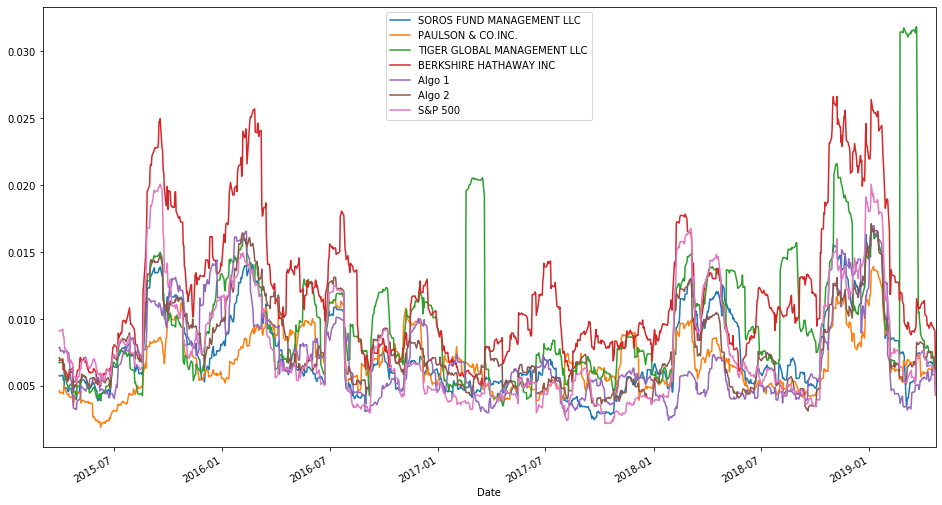

In [24]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
CombinedReturns_DF.rolling(window=21).std().plot()


In [25]:
# Construct a correlation table
# YOUR CODE HERE
CombinedReturns_DF.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


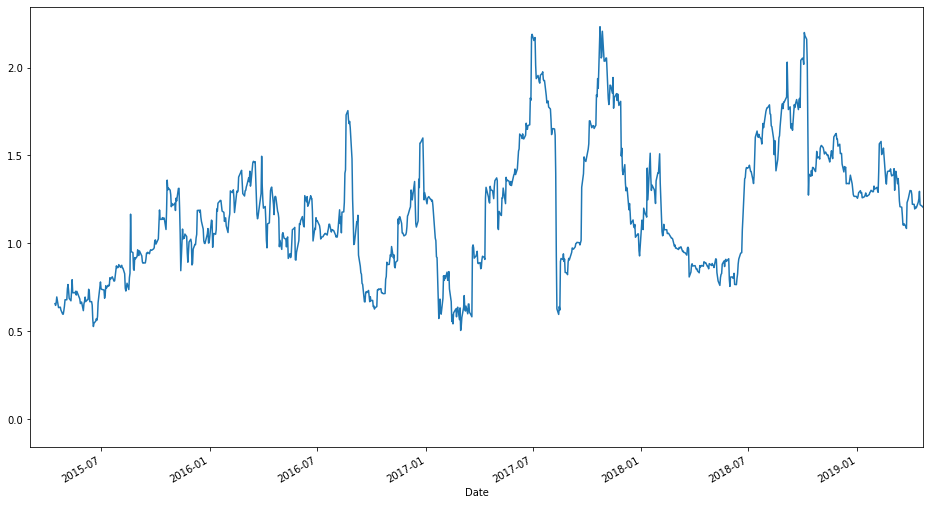

In [26]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
import matplotlib.pyplot as plt
plt.scatter(CombinedReturns_DF['BERKSHIRE HATHAWAY INC'], CombinedReturns_DF['S&P 500'])
plt.show
BHBeta = CombinedReturns_DF['BERKSHIRE HATHAWAY INC'].rolling(window=30).cov(CombinedReturns_DF['S&P 500'])/CombinedReturns_DF['S&P 500'].rolling(window=30).var()
BHBeta.plot()

0.032468221476108394


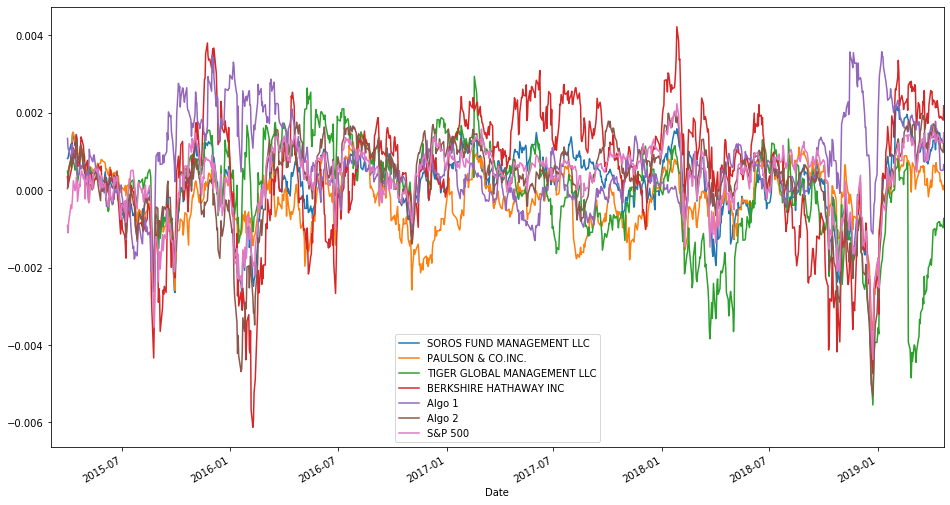

In [27]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE
#halflifefloat, optional Specify decay in terms of half-life, α=1−exp(log(0.5)/halflife),forhalflife>0
import math
half_life = 21 #half life in days
half_life_years = half_life/365
alpha= 1 - math.exp(np.log(0.5)/half_life)
print(alpha)
CombinedReturns_DF.ewm(min_periods=21,alpha=alpha).mean().plot()
#sp500_returns_DF.ewm(alpha=alpha).mean().plot()

## Rolling Statistics

####  Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
Visually the risks on most individual portfolios  seem to generally increase with S&P500 as demonstrated by positive correlations; however the BH and Tiger portfolios demonstrate most 'beta'; and least being Algo 1

#### Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
The highest correlation with S&P 500 is the Algo 2 portflio--> implying mimicing closely S&P

#### Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
BH Inc beta is plotted (30 day rolling). Portfolio has been highly sensitive to movements in S&P 500 during Q2 2017, Q1 2018 and Q3 2018 when beta has spiked above 2.

#### An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.
Please reference calculations of decay factor which have been commented. An excel file confirming my calculations has been attached. I am confident of my response but unable to converge to the visual presented in the starter code.

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [28]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
#print((CombinedReturns_DF.mean()*252))
#print(CombinedReturns_DF.std()*np.sqrt(252))
print((CombinedReturns_DF.mean()*252)/(CombinedReturns_DF.std()*np.sqrt(252)))

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64


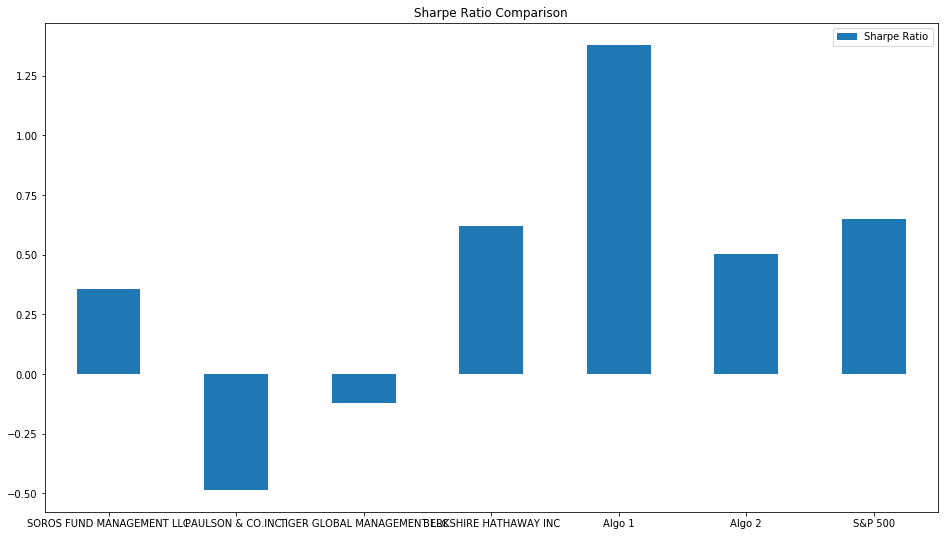

In [29]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_series1=((CombinedReturns_DF.mean()*252)/(CombinedReturns_DF.std()*np.sqrt(252)))
df1=sharpe_series1.to_frame()
df1.columns=['Sharpe Ratio']
ax = df1.plot.bar(rot=0,title="Sharpe Ratio Comparison")

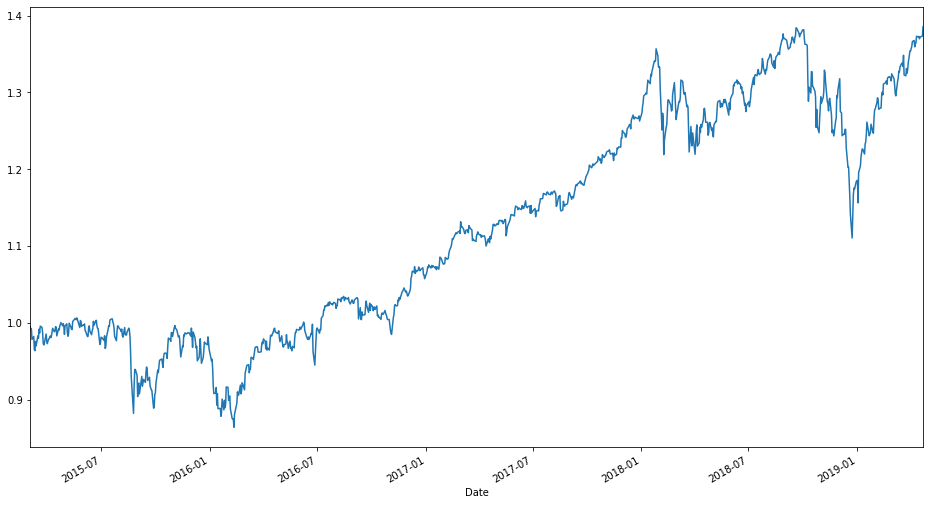

In [30]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
((CombinedReturns_DF['S&P 500'] + 1).cumprod() ).plot() #"Starts with $1 balance"

## Sharpe Ratio
#### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios?
From a Sharpe ratio perspective Algo 1 outperforms S&P 500; 1.37 units of return per unit of risk. Algo 2 underperforms S&P 500: 0.50 units of return per unit of risk.
Algo 1 portfolio outperforms Whales

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [31]:
# Read the first stock
# YOUR CODE HERE
GOOG_csv = Path("Resources/Python Stocks - GOOG.csv")
GOOG=pd.read_csv(GOOG_csv,index_col="Date", infer_datetime_format=True, parse_dates=True)

GOOG=GOOG.dropna()
GOOG.head()
GOOG['Close']

Date
2014-02-01 16:00:00     556.55
2014-03-01 16:00:00     552.50
2014-06-01 16:00:00     558.66
2014-07-01 16:00:00     569.42
2014-08-01 16:00:00     570.61
                        ...   
2019-12-23 16:00:00    1348.84
2019-12-24 13:00:00    1343.56
2019-12-26 16:00:00    1360.40
2019-12-27 16:00:00    1351.89
2019-12-30 16:00:00    1336.14
Name: Close, Length: 1509, dtype: float64

In [32]:
# Read the second stock
# YOUR CODE HERE
AAPL_csv = Path("Resources/Python Stocks - AAPL.csv")
AAPL=pd.read_csv(AAPL_csv,infer_datetime_format=True, parse_dates=True)
AAPL=AAPL.dropna()

AAPL=AAPL.rename(columns=AAPL.iloc[0]).drop(AAPL.index[0])
AAPL=AAPL.set_index('Date')

AAPL.head()

,Close
Date,
02/01/2014 16:00:00,79.02
03/01/2014 16:00:00,77.28
06/01/2014 16:00:00,77.7
07/01/2014 16:00:00,77.15
08/01/2014 16:00:00,77.64


In [33]:
# Read the third stock
# YOUR CODE HERE
TSLA_csv = Path("Resources/Python Stocks - TSLA.csv")
TSLA=pd.read_csv(TSLA_csv,infer_datetime_format=True, parse_dates=True)
TSLA=TSLA.dropna()

TSLA=TSLA.rename(columns=TSLA.iloc[0]).drop(TSLA.index[0])
TSLA=TSLA.set_index('Date')

TSLA.head()

,Close
Date,
02/01/2014 16:00:00,150.1
03/01/2014 16:00:00,149.56
06/01/2014 16:00:00,147
07/01/2014 16:00:00,149.36
08/01/2014 16:00:00,151.28


In [34]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
#AllStocks_DF=pd.concat(['GOOG','AAPL','TSLA'],axis="columns",join="inner")
AllStocks_DF=pd.concat([GOOG,AAPL,TSLA],axis="columns",join="inner")
AllStocks_DF.head()


,Close,Close,Close
Date,,,
2014-02-01 16:00:00,556.55,79.02,150.1
2014-03-01 16:00:00,552.50,77.28,149.56
2014-06-01 16:00:00,558.66,77.7,147
2014-07-01 16:00:00,569.42,77.15,149.36
2014-08-01 16:00:00,570.61,77.64,151.28


In [35]:
#Column names Set to Google, Apple and Tesla
AllStocks_DF.columns = ['Google','Apple','Tesla']
AllStocks_DF.head()

,Google,Apple,Tesla
Date,,,
2014-02-01 16:00:00,556.55,79.02,150.1
2014-03-01 16:00:00,552.50,77.28,149.56
2014-06-01 16:00:00,558.66,77.7,147
2014-07-01 16:00:00,569.42,77.15,149.36
2014-08-01 16:00:00,570.61,77.64,151.28


In [36]:
# Reset the index
# YOUR CODE HERE
#AllStocks_DF['Date'] = pd.to_datetime(AllStocks_DF['Date'])
#AllStocks_DF['Trade Date'] = AllStocks_DF['Date'].dt.date
AllStocks_DF.index=pd.to_datetime(AllStocks_DF.index)
AllStocks_DF['Trade Date'] = AllStocks_DF.index.date
AllStocks_DF=AllStocks_DF.set_index('Trade Date')
AllStocks_DF.head()

,Google,Apple,Tesla
Trade Date,,,
2014-02-01,556.55,79.02,150.1
2014-03-01,552.50,77.28,149.56
2014-06-01,558.66,77.7,147
2014-07-01,569.42,77.15,149.36
2014-08-01,570.61,77.64,151.28


In [37]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE
#DF is already in requisite format. A pivot table currently will violate DRY principles. The dataframe reading process has been optimized to read data in a modular manner
AllStocks_DF.head()


,Google,Apple,Tesla
Trade Date,,,
2014-02-01,556.55,79.02,150.1
2014-03-01,552.50,77.28,149.56
2014-06-01,558.66,77.7,147
2014-07-01,569.42,77.15,149.36
2014-08-01,570.61,77.64,151.28


In [38]:
#One more check to drop nulls and review Tail
AllStocks_DF=AllStocks_DF.dropna()
AllStocks_DF.tail()

,Google,Apple,Tesla
Trade Date,,,
2019-12-23,1348.84,284,419.22
2019-12-24,1343.56,284.27,425.25
2019-12-26,1360.40,289.91,430.94
2019-12-27,1351.89,289.8,430.38
2019-12-30,1336.14,291.52,414.7


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [39]:
# Calculate weighted portfolio 

#Initialized weights into a list
weights = [1/3, 1/3, 1/3]

# YOUR CODE HERE
#Convert to float as some columns are strings
AllStocks_DF['Apple'] = AllStocks_DF['Apple'].astype(float)
AllStocks_DF['Tesla'] = AllStocks_DF['Tesla'].astype(float)
#Apply pct_change and calculate custom returns
AllStocks_DF_returns=AllStocks_DF.pct_change()
AllStocks_DF_returns['Custom']=weights[0]*AllStocks_DF_returns['Google']+weights[1]*AllStocks_DF_returns['Apple']+weights[2]*AllStocks_DF_returns['Tesla']
AllStocks_DF_returns.head()

# More Elegant Solution using matrix algebra
#weights_array = np.array(weights)
#AllStocks_DF_returns['CustomNew']=AllStocks_DF_returns['Google','Amazon','Tesla']].dot(weights_array.T)

,Google,Apple,Tesla,Custom
Trade Date,,,,
2014-02-01,NaN,NaN,NaN,NaN
2014-03-01,-0.007277,-0.022020,-0.003598,-0.010965
2014-06-01,0.011149,0.005435,-0.017117,-0.000178
2014-07-01,0.019260,-0.007079,0.016054,0.009412
2014-08-01,0.002090,0.006351,0.012855,0.007099


The question perhaps has to be restated. The solution above assumes equal $ weighted across the three stocks.
Question states *'Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock' * : so if we had $100 and two stocks one at $99 and the other at $1; we would buy 1 share of each per question. So portfolio is 99% stock A and 1% stock B which is not what is intended. The intent is to buy $50 of each stock

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [40]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
NewCombined=pd.concat([CombinedReturns_DF,AllStocks_DF_returns['Custom']],axis="columns",join="inner")
NewCombined.index.name='Date'
NewCombined.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.010414
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.006395
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.003701
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,-0.008363
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,0.010460


In [41]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
NewCombined=NewCombined.dropna()
NewCombined.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.010414
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.006395
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.003701
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,-0.008363
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,0.010460


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [42]:
# Risk
# YOUR CODE HERE
NewCombined.std()*np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.127932
PAULSON & CO.INC.              0.111736
TIGER GLOBAL MANAGEMENT LLC    0.175575
BERKSHIRE HATHAWAY INC         0.208894
Algo 1                         0.122085
Algo 2                         0.134050
S&P 500                        0.137639
Custom                         0.241167
dtype: float64

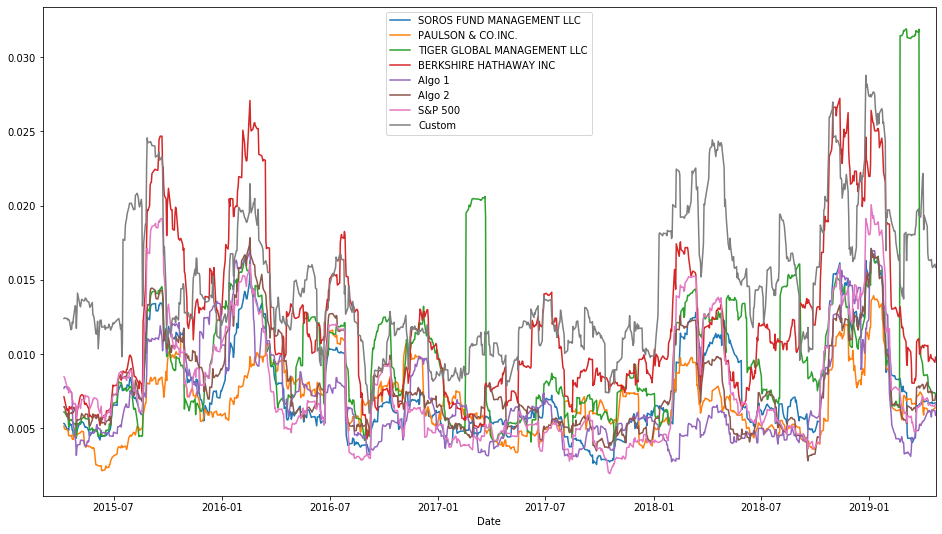

In [43]:
# Rolling
# YOUR CODE HERE
NewCombined.rolling(window=21).std().plot()

In [44]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
print((NewCombined.mean()*252)/(NewCombined.std()*np.sqrt(252)))

SOROS FUND MANAGEMENT LLC      0.121731
PAULSON & CO.INC.             -0.598906
TIGER GLOBAL MANAGEMENT LLC   -0.005443
BERKSHIRE HATHAWAY INC         0.279523
Algo 1                         1.354661
Algo 2                         0.312897
S&P 500                        0.427065
Custom                         0.508462
dtype: float64


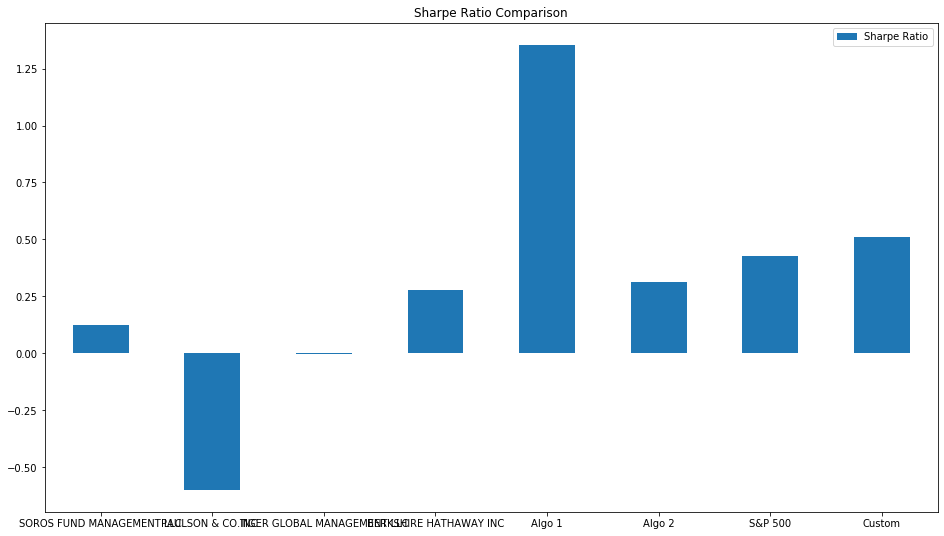

In [45]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_series=((NewCombined.mean()*252)/(NewCombined.std()*np.sqrt(252)))
df=sharpe_series.to_frame()
#names=sharpe_series.keys()
#values=sharpe_series.values()
#sharpe_series[0]
#print(names)
df.columns=['Sharpe Ratio']
ax = df.plot.bar(rot=0,title="Sharpe Ratio Comparison")

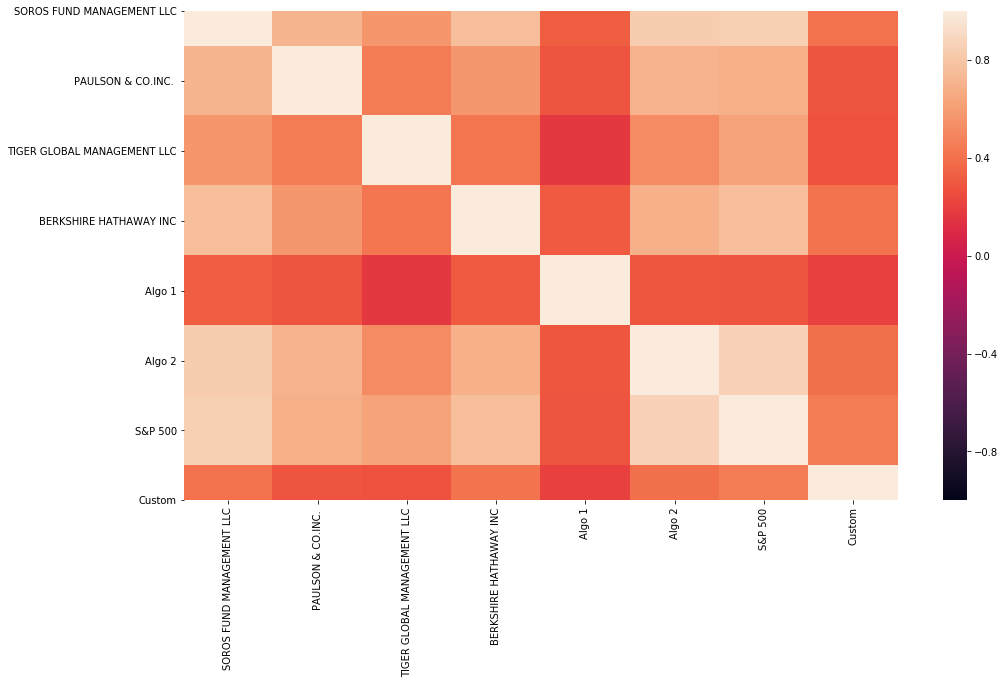

In [46]:
# Create a correlation analysis
# YOUR CODE HERE
correlation=NewCombined.corr()
sns.heatmap(correlation, vmin=-1, vmax=1)

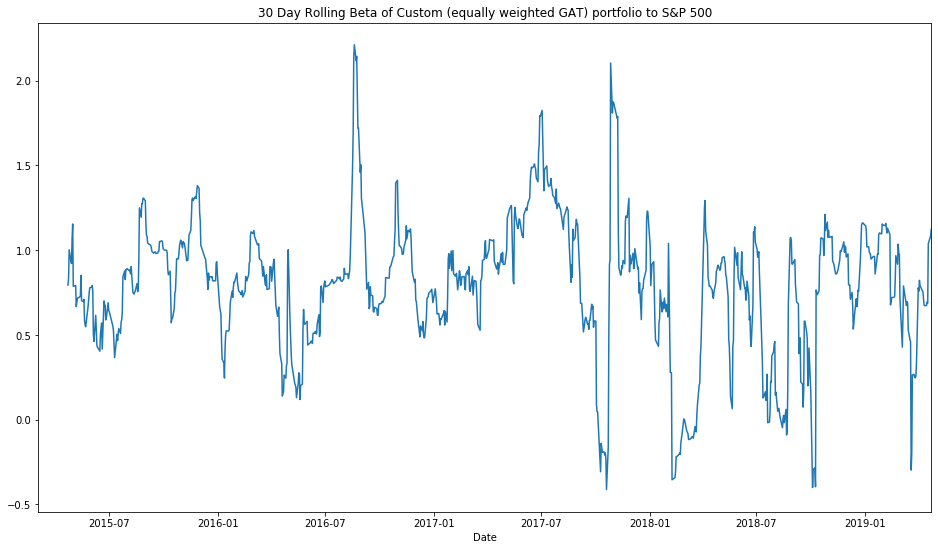

In [47]:
# Beta
# YOUR CODE HERE
#30 day rolling betas plotted. beta calculated as covariance of potfolio to market to variance of market
import matplotlib.pyplot as plt
plt.scatter(NewCombined['Custom'], NewCombined['S&P 500'])
plt.show
NewBeta = NewCombined['Custom'].rolling(window=30).cov(NewCombined['S&P 500'])/NewCombined['S&P 500'].rolling(window=30).var()
NewBeta.plot(title="30 Day Rolling Beta of Custom (equally weighted GAT) portfolio to S&P 500")

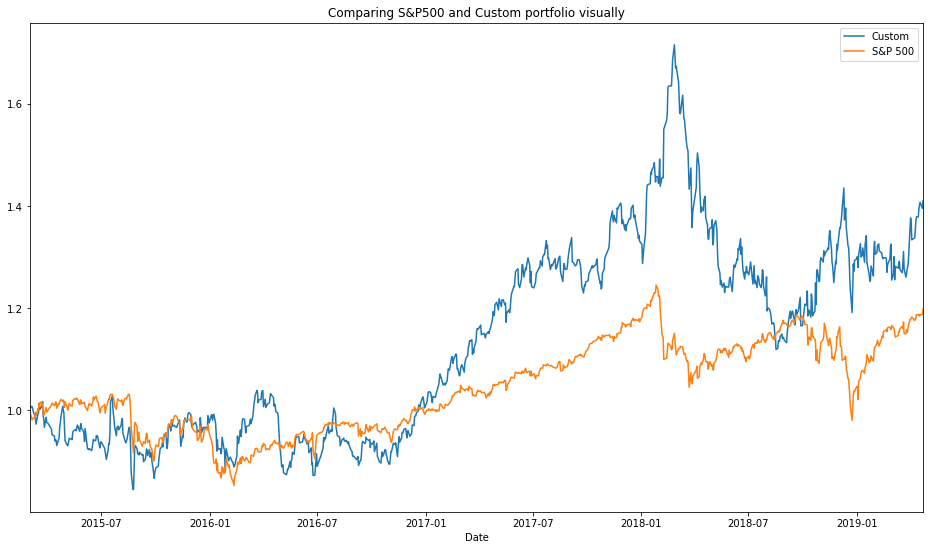

In [48]:
# Plot cumulative returns
# YOUR CODE HERE
#CustomSP500['Date']=NewCombined['Date']
CustomSP500 = NewCombined[['Custom', 'S&P 500']].copy()
((CustomSP500 + 1).cumprod() ).plot(title="Comparing S&P500 and Custom portfolio visually") #"Starts with $1 balance"
# ((CombinedReturns_DF + 1).cumprod() -1).plot() "For starting at zero"

In [49]:
## Calculate information ratio of Custom portfolio
import numpy as np
def information_ratio(returns, benchmark_returns, days=252):
 return_difference = returns - benchmark_returns
 volatility = return_difference.std() * np.sqrt(days)
 information_ratio = return_difference.mean() / volatility
 return information_ratio
print(information_ratio(NewCombined['Custom'],NewCombined['S&P 500']))

0.001166766999937993


## Custom Portfolio
1. Graph above confirms Custom portolio significantly outperforms S&P500 on a cumulative returns basis
2. Even on a risk adjusted basis, the Custom portfolio outperforms (Sharpe ratio of 0.5 vs. .4 for S&P 500) implying higer return per unit of risk. The information ratio is positive which implies that Custom outperformed benchmark on a risk adjusted basis; but the IR is not in the 0.4 to 0.6 range which indicates repeatable outperformance
3. The rolling beta on a stand-alone basis is not informative. While beta has been largely below 1; it has spiked during periods
4. The bottom of the workbook uses pypoft to compare Custom portfolio and includes additional commentary that establishes that Custom portfolio outperforms all other options except Algo 1 (from a maximizing Sharpe ratio lens in a model portfolio.)

In [50]:
import pandas as pd
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# Read in price data
df_pyport = NewCombined

# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(df_pyport,returns_data=True)
S = risk_models.sample_cov(df_pyport,returns_data=True)

# Optimise for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
ef.save_weights_to_file("weights.csv")  # saves to file
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

## REPEAT FOR PORTFOLIO WITHOUT CUSTOM
df_pyport_exclCustom=NewCombined.drop(columns=['Custom'],axis=1)
# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(df_pyport_exclCustom,returns_data=True)
S = risk_models.sample_cov(df_pyport_exclCustom,returns_data=True)

# Optimise for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
ef.save_weights_to_file("weights_withoutcustom.csv")  # saves to file
print(cleaned_weights)
ef.portfolio_performance(verbose=True)



OrderedDict([('SOROS FUND MANAGEMENT LLC', 0.0), ('PAULSON & CO.INC. ', 0.0), ('TIGER GLOBAL MANAGEMENT LLC', 0.0), ('BERKSHIRE HATHAWAY INC', 0.0), ('Algo 1', 0.92172), ('Algo 2', 0.0), ('S&P 500', 0.0), ('Custom', 0.07828)])
Expected annual return: 16.2%
Annual volatility: 11.8%
Sharpe Ratio: 1.21
OrderedDict([('SOROS FUND MANAGEMENT LLC', 0.0), ('PAULSON & CO.INC. ', 0.0), ('TIGER GLOBAL MANAGEMENT LLC', 0.0), ('BERKSHIRE HATHAWAY INC', 0.0), ('Algo 1', 1.0), ('Algo 2', 0.0), ('S&P 500', 0.0)])
Expected annual return: 16.5%
Annual volatility: 12.2%
Sharpe Ratio: 1.19


(0.16538367543156707, 0.12208477215628423, 1.190842009726301)

## Another angle to Custom portfolio performance using pypoft
The code above optimizes allocation between the initial choices (BH Inc, Algo 1 etc.) and the Custom portfolio (GAT equally weighted). The optimal portfolio that maximizes Sharpe ratio Custom portfolio is second only to Algo 1 and finds an allocation in the Sharpe optimized model portfolio.
OrderedDict([('SOROS FUND MANAGEMENT LLC', 0.0), ('PAULSON & CO.INC. ', 0.0), ('TIGER GLOBAL MANAGEMENT LLC', 0.0), ('BERKSHIRE HATHAWAY INC', 0.0), ('Algo 1', 0.92172), ('Algo 2', 0.0), ('S&P 500', 0.0), ('Custom', 0.07828)])
Expected annual return: 16.2%
Annual volatility: 11.8%
Sharpe Ratio: 1.21
(0.16203617959132777, 0.11779518576021951, 1.2057893425326611)

For a portfolio without Custom, Algo 1 significantly outperforms the Whales
OrderedDict([('SOROS FUND MANAGEMENT LLC', 0.0), ('PAULSON & CO.INC. ', 0.0), ('TIGER GLOBAL MANAGEMENT LLC', 0.0), ('BERKSHIRE HATHAWAY INC', 0.0), ('Algo 1', 1.0), ('Algo 2', 0.0), ('S&P 500', 0.0)])
Expected annual return: 16.5%
Annual volatility: 12.2%
Sharpe Ratio: 1.19
